# Sklearn Tutorial w/ an Empirical Software Engineering Bent
## Licensing
   - Licensed under Creative Commons CC-BY-SA 4.0
   - Some text and images copyright Wikipedia 2012
   - (C) 2020 Abram Hindle
   - Code (C) 2020 Abram Hindle and sklearn developers. Code is BSD licensed (sklearn license)
## Prerequisites
   - pip3 install --user sklearn wittgenstein
   - you need jupyter notebook or lab.
 

# Machine Learning Classifiers
## Intro
   - AI that learns from data
     - Learn what spam looks likes to filter it out
   - Classify data into types
     - Learning spam
   - Cluster data by similarity
     - Finding messages that are similar to spam
   - Represent Data
     - Come up with representations to learn from
   - Find important and distinct properties of the data.
     - Certain words are spam keywords!

## Kinds of ML
   - Supervised
     - we give it classified examples and hope it can classify more
   - Unsupervised 
     - labels unknown, let the algorithm find them
   - Semi Supervised learning
     - labelled and unlablled.
   - Representation Learning
     - How to represent data
   - Reinforcement Learning
     - policies to reward the learner

## Sklearn
   - ML Toolkit
   - Good for initial exploration if something will work
   - Nice way to debug classic ML learners
   - Easy to automate in python

## Some Kinds of Learners for Classification
   - Tree Based
     - C4.5 (J48)
     - Random Forest
     - Decision Tree
   - Rule Learners
     - Ripper (jRip)
   - Support Vector Machines
     - SVM/LibSVM
   - Bayesian Nets



# Learners
## Learners operate on different classes and values
   - Some learners are boolean (True/False or 0/1)
   - Some learners are nominal (class) (A/B/C/..)
   - Some learners learn counts (1,2,3,..)
   - Some learners learn real functions (Y = b + ax)

# SKlearn has lots of classifiers:
   - https://scikit-learn.org/stable/supervised_learning.html


# SKLearn API
* Construct the learner
* Split the dataset
* Fit the learner
* Predict label or predict probability
* Score the results

# First we'll load some data

In [4]:

import sklearn
import scipy.io
import scipy.io.arff
import numpy as np
import sklearn.model_selection
import sklearn.dummy


coffeering, meta = scipy.io.arff.loadarff("./data/coffee-ring/coffee-ring.arff")
print(meta)
print(coffeering)
coffeeringX = np.array([[x[0],x[1]] for x in coffeering])
coffeeringY = np.array([x[2]==b'1' for x in coffeering])
print(coffeeringX)
print(coffeeringX.shape)
print(coffeeringY)
print(coffeeringY.shape)


Dataset: small-slice-weka.filters.unsupervised.attribute.NumericToNominal-Rlast
	X's type is numeric
	Y's type is numeric
	CLASS's type is nominal, range is ('0', '1')

[(0.385, 0.395, b'1') (0.581, 0.361, b'1') (0.602, 0.63 , b'1') ...
 (0.467, 0.121, b'0') (0.225, 0.472, b'0') (0.915, 0.869, b'0')]
[[0.385 0.395]
 [0.581 0.361]
 [0.602 0.63 ]
 ...
 [0.467 0.121]
 [0.225 0.472]
 [0.915 0.869]]
(1999, 2)
[ True  True  True ... False False False]
(1999,)


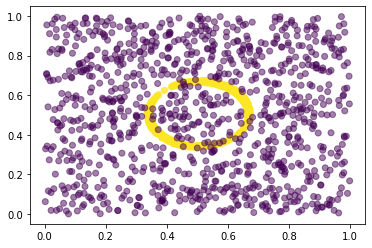

In [14]:
import numpy as np
import matplotlib.pyplot as plt

plt.scatter(coffeeringX[:,0],coffeeringX[:,1], c=coffeeringY, alpha=0.5)
plt.show()

In [15]:
# Construct
zeror = sklearn.dummy.DummyClassifier(strategy="most_frequent")
# Split
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(coffeeringX, coffeeringY, test_size=0.5, random_state=0)
# Fit
print(zeror.fit(X_train, y_train))
print("Accuracy on train set:",zeror.score(X_train,y_train))
# Predict
prediction = zeror.predict(X_test)
print(prediction[0:10])
# Score
print("Accuracy on test set:",sklearn.metrics.accuracy_score(y_test, prediction))

DummyClassifier(strategy='most_frequent')
Accuracy on train set: 0.5025025025025025
[False False False False False False False False False False]
Accuracy on test set: 0.498


## Most Frequent / ZeroR Learner
   - The smartest monkey
   - Always chooses the class with the largest number of entities
   - Good as a base line. 
   - If you measure accuracy you have to beat ZeroR.




In [20]:
import sklearn
import sklearn.dummy


X = coffeeringX
y = coffeeringY
zeror = sklearn.dummy.DummyClassifier(strategy="most_frequent")
zeror.fit(X, y)
prediction = zeror.predict(X)
print(prediction)
print("Accuracy: ",zeror.score(X, y))
print("Are all the predictions false?")
print(np.all(prediction==False))



[False False False ... False False False]
Accuracy:  0.5002501250625313
Are all the predictions false?
True



## C4.5 and Tree Learners
   - Produces a decision tree
   - The model is code and interpretable
   - Sometimes trees are too big.
   - each branch is a conditional
   - each leaf is a class


Accuracy:  1.0


[Text(0.523193359375, 0.96875, 'X[1] <= 0.675\ngini = 0.5\nsamples = 1999\nvalue = [1000, 999]'),
 Text(0.507568359375, 0.90625, 'X[1] <= 0.335\ngini = 0.476\nsamples = 1641\nvalue = [642, 999]'),
 Text(0.491943359375, 0.84375, 'gini = 0.0\nsamples = 329\nvalue = [329, 0]'),
 Text(0.523193359375, 0.84375, 'X[0] <= 0.332\ngini = 0.363\nsamples = 1312\nvalue = [313, 999]'),
 Text(0.507568359375, 0.78125, 'gini = 0.0\nsamples = 105\nvalue = [105, 0]'),
 Text(0.538818359375, 0.78125, 'X[0] <= 0.678\ngini = 0.285\nsamples = 1207\nvalue = [208, 999]'),
 Text(0.523193359375, 0.71875, 'X[1] <= 0.618\ngini = 0.169\nsamples = 1102\nvalue = [103, 999]'),
 Text(0.21826171875, 0.65625, 'X[0] <= 0.382\ngini = 0.2\nsamples = 823\nvalue = [93, 730]'),
 Text(0.0546875, 0.59375, 'X[1] <= 0.373\ngini = 0.058\nsamples = 233\nvalue = [7, 226]'),
 Text(0.0390625, 0.53125, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.0703125, 0.53125, 'X[1] <= 0.604\ngini = 0.042\nsamples = 231\nvalue = [5, 226]'),
 T

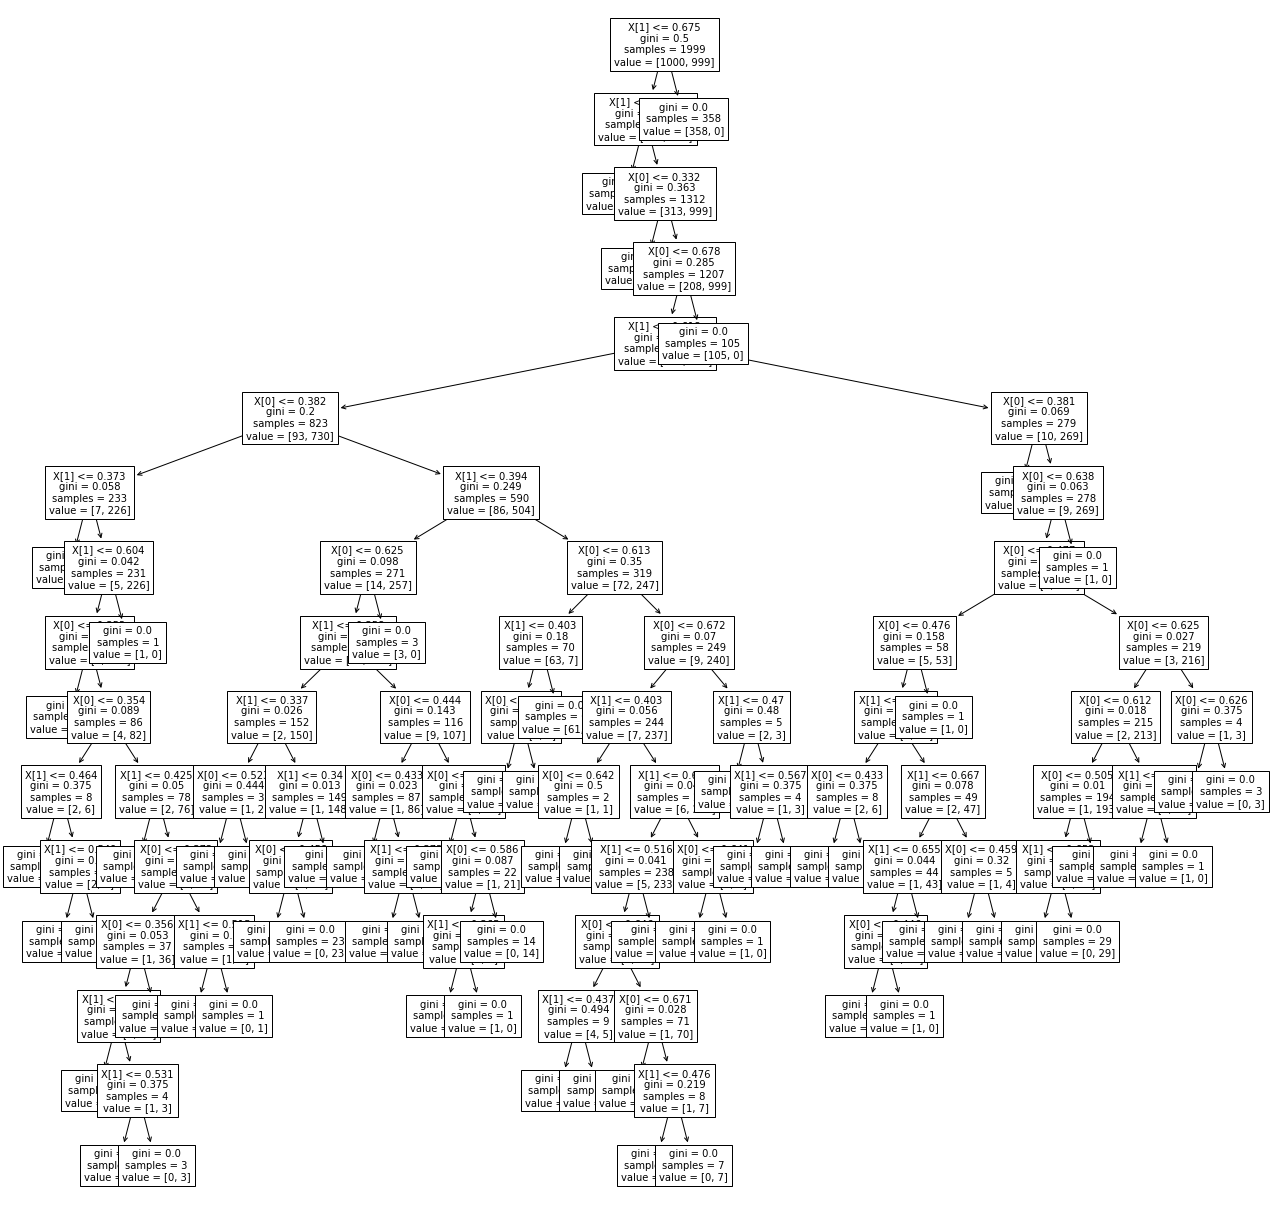

In [21]:
# See Scitkit Learn Documentation https://scikit-learn.org/stable/modules/tree.html
import graphviz
import sklearn.tree
tree = sklearn.tree.DecisionTreeClassifier()

tree = tree.fit(coffeeringX, coffeeringY)
print("Accuracy: ",tree.score(X, y))
plt.figure(figsize=(22,22))
sklearn.tree.plot_tree(tree, fontsize=10)


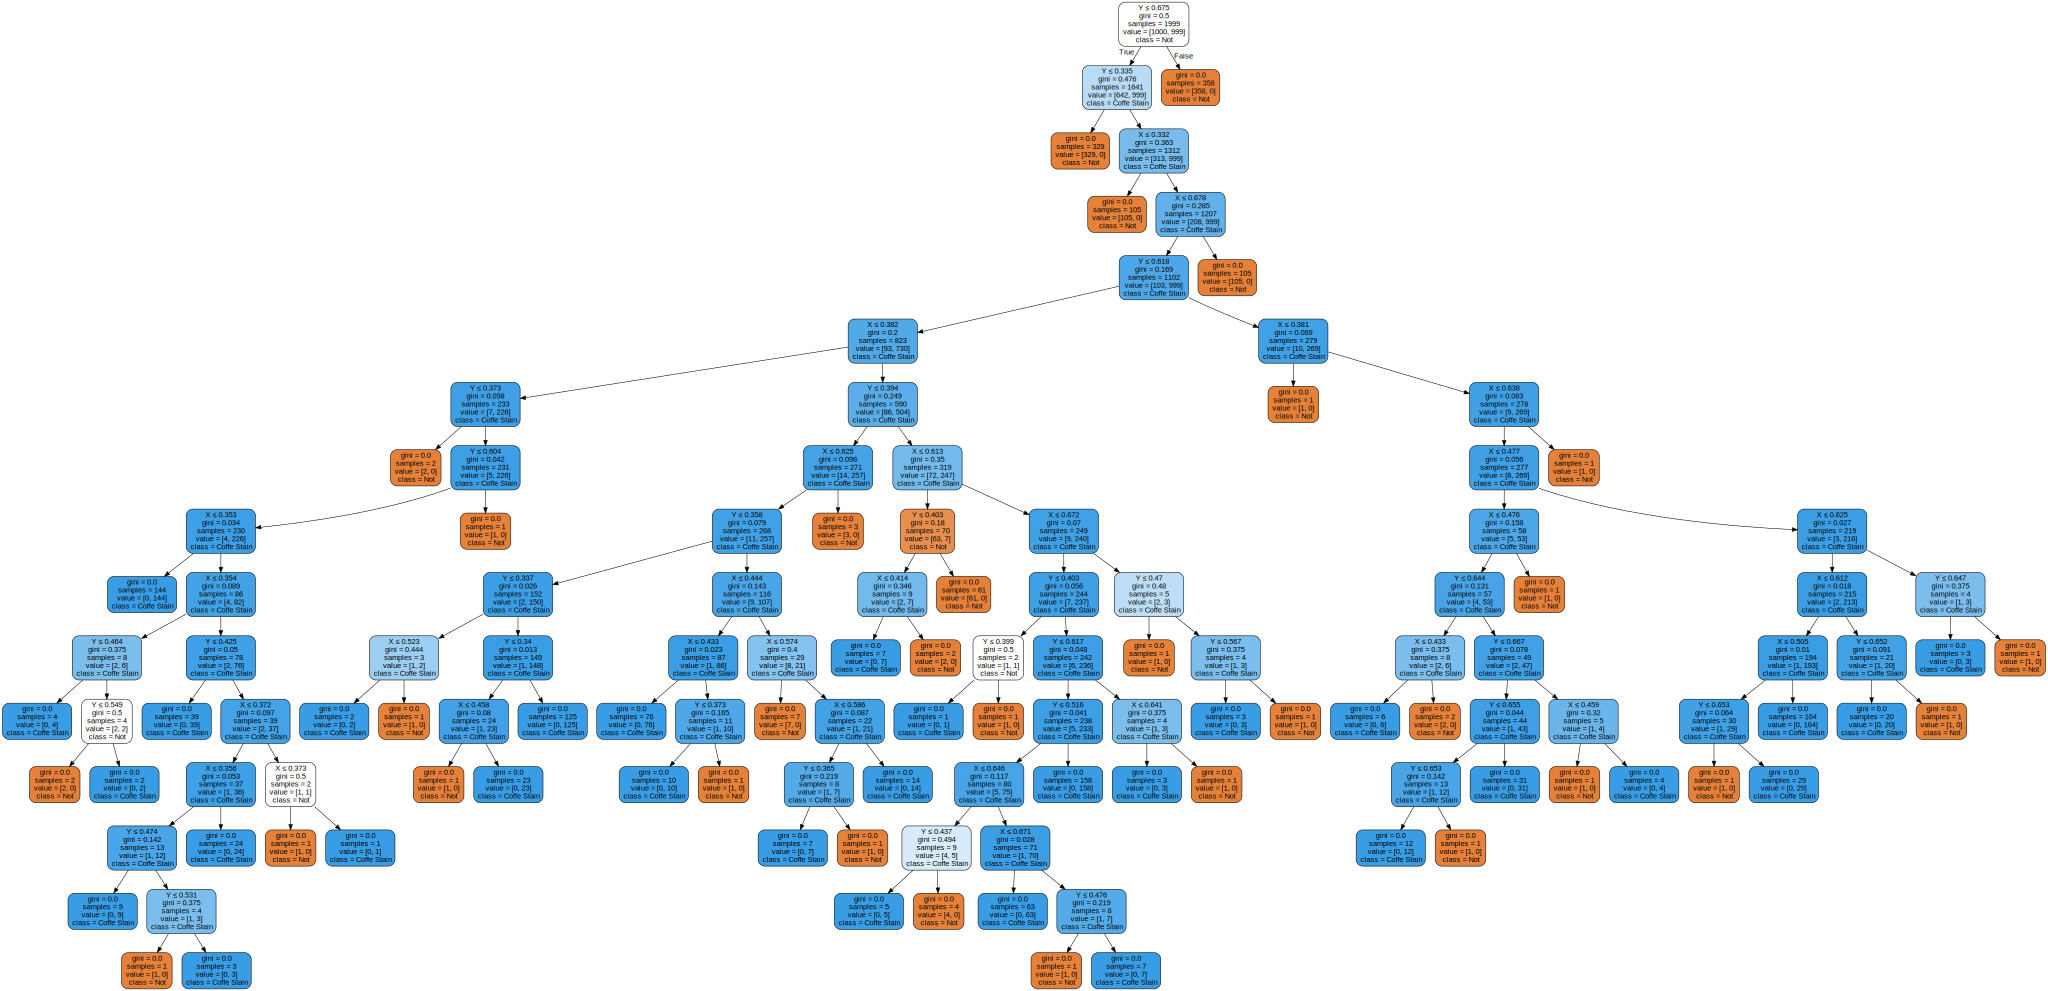

In [9]:
# pretty plot
import graphviz
dot_data = sklearn.tree.export_graphviz(tree, out_file=None, 
                      feature_names=["X","Y"],
                      class_names=["Not","Coffe Stain"],  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

Accuracy:  0.9484742371185593


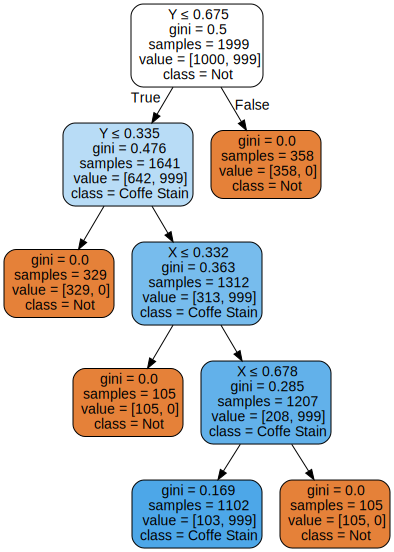

In [22]:
MAXDEPTH = 4

tree = sklearn.tree.DecisionTreeClassifier(max_depth=MAXDEPTH)

tree = tree.fit(coffeeringX, coffeeringY)
print("Accuracy: ",tree.score(X, y))


#sklearn.tree.plot_tree(tree)

dot_data = sklearn.tree.export_graphviz(tree, out_file=None, 
                      feature_names=["X","Y"],
                      class_names=["Not","Coffe Stain"],  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

In [24]:
# edx, meta = scipy.io.arff.loadarff("./data/triage/data/edx-platform/large.arff")
import csv

def parse_arff_lines(lines):
    reader = csv.reader(lines,delimiter=',',quotechar="'")
    return [row for row in reader]
    
def read_string_arff(fd):
    lines = fd.readlines()
    for i,line in enumerate(lines):
        if line == "@data\n":
            return parse_arff_lines(lines[i+1:])
    return None
edxfile = "./data/triage/data/edx-platform/largewo.arff"
edx = read_string_arff(open(edxfile))
# owners
edxY = np.array([x[1] for x in edx])
# content
edxX = np.array([x[2] for x in edx])
print(edxY[0:10])
print(edxX[0:10])

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
countvectorizer = CountVectorizer()
tfidfvectorizer = TfidfVectorizer()
countedx = countvectorizer  
countEdxX = countvectorizer.fit_transform(edxX)
tfidfEdxX = tfidfvectorizer.fit_transform(edxX)
print(edxY.shape)
print(countEdxX.shape)
print(tfidfEdxX.shape)


['sarina' 'nasthagiri' 'clintonb' 'nedbat' 'sarina' 'ormsbee'
 'chrisndodge' 'sarina' 'sarina' 'auraz']
['"Lazy loading of CourseMode model\'s internationalization.\\nThe use of `ugettext` here instead of `ugettext_lazy` can cause cyclical imports if this module is loaded earlier than expected. Per the Django documentation:\\r\\nhttps://docs.djangoproject.com/en/dev/topics/i18n/translation/#lazy-translation\\r\\n\\r\\nAnd yes'
 '"Small changes to the segment.io event handler\\nFix a couple of outstanding issues discovered during end-to-end testing:\\n\\n1) The segment.io client libraries don\'t always set the channel field properly'
 'This confirms the data api upgrade\\n'
 'Generalizing CONTRIBUTING.rst to all repos\\n'
 'Email content history fix and additions\\nThis addresses a bug in the email content history table where\\r\\n"Unknown" was displayed in the number of emails sent column if any sort of\\r\\nfailure occurred during email sending. This behavior has been edited so now\\r

In [25]:
np.sum(tfidfEdxX[0].toarray())

5.8381221915102035



## Naive Bayes
   - Asks the question what is the probability of this value belonging
     to this class?
   - multiplies all of these probabilities together
   - can perform really badly on numerical problems.

In [26]:
%%time
from sklearn.model_selection import train_test_split
import sklearn.naive_bayes

classifiers = [
    ["GaussainNB",sklearn.naive_bayes.GaussianNB],
    ["MultinomialNB",sklearn.naive_bayes.MultinomialNB],
    ["ComplementNB",sklearn.naive_bayes.ComplementNB],
    ["BernoulliNB",sklearn.naive_bayes.BernoulliNB]
]

for classifier in classifiers:
    name, constructor = classifier
    nb = constructor()
    nb.fit(coffeeringX, coffeeringY)
    print("%s with coffeestain" % name)
    print(nb.score(coffeeringX, coffeeringY))
    nb = constructor()
    nb.fit(countEdxX.toarray(), edxY)
    print("%s with triagers counts" % name)
    print(nb.score(countEdxX.toarray(), edxY))
    nb = constructor()
    nb.fit(tfidfEdxX.toarray(), edxY)
    print("%s with triagers tfidf" % name)
    print(nb.score(tfidfEdxX.toarray(), edxY))

    
    X_train, X_test, y_train, y_test = train_test_split(coffeeringX, coffeeringY, test_size=0.5, random_state=0)
    nb = constructor()
    nb.fit(X_train, y_train)
    print("%%50 test split %s with coffeestain" % name)
    print(nb.score(X_test, y_test))
    
    X_train, X_test, y_train, y_test = train_test_split(countEdxX, edxY, test_size=0.5, random_state=0)
    nb = constructor()
    nb.fit(X_train.toarray(), y_train)
    print("%%50 test split %s with triagers counts" % name)
    print(nb.score(X_test.toarray(), y_test))
    
    



GaussainNB with coffeestain
0.9159579789894947
GaussainNB with triagers counts
0.9971181556195965
GaussainNB with triagers tfidf
1.0
%50 test split GaussainNB with coffeestain
0.921
%50 test split GaussainNB with triagers counts
0.16091954022988506
MultinomialNB with coffeestain
0.5002501250625313
MultinomialNB with triagers counts
0.8472622478386167
MultinomialNB with triagers tfidf
0.5763688760806917
%50 test split MultinomialNB with coffeestain
0.498
%50 test split MultinomialNB with triagers counts
0.1724137931034483
ComplementNB with coffeestain
0.5032516258129065
ComplementNB with triagers counts
0.9769452449567724
ComplementNB with triagers tfidf
0.9855907780979827
%50 test split ComplementNB with coffeestain
0.499
%50 test split ComplementNB with triagers counts
0.25287356321839083
BernoulliNB with coffeestain
0.5002501250625313
BernoulliNB with triagers counts
0.21613832853025935
BernoulliNB with triagers tfidf
0.21613832853025935
%50 test split BernoulliNB with coffeestain
0.



## Logistic Regression
   - Linear Regression used for true false
   - Lots of features means huge matrices and lots of memory
   - You should have about 10 to 100 samples per feature used.


In [27]:
name = "Logistic Regression"
lr = sklearn.linear_model.LogisticRegression()
print(lr.get_params())
lr.fit(coffeeringX, coffeeringY)
print("%s with coffeestain" % name)
print(lr.score(coffeeringX, coffeeringY))
pcX = lr.predict_proba(coffeeringX)
print(pcX)
print(coffeeringY)
for i in [0.1,0.2,0.3,0.48,0.49,0.495,0.5,0.51,0.52,0.7,0.9]:
    print(i,sklearn.metrics.accuracy_score(coffeeringY,pcX[:,1] >= i))

print(lr)
print(lr.coef_)
print(lr.intercept_)


{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
Logistic Regression with coffeestain
0.5042521260630315
[[0.50114029 0.49885971]
 [0.50017666 0.49982334]
 [0.49947019 0.50052981]
 ...
 [0.50131189 0.49868811]
 [0.50181797 0.49818203]
 [0.49728243 0.50271757]]
[ True  True  True ... False False False]
0.1 0.49974987493746875
0.2 0.49974987493746875
0.3 0.49974987493746875
0.48 0.49974987493746875
0.49 0.49974987493746875
0.495 0.49974987493746875
0.5 0.5042521260630315
0.51 0.5002501250625313
0.52 0.5002501250625313
0.7 0.5002501250625313
0.9 0.5002501250625313
LogisticRegression()
[[0.02120116 0.00885003]]
[-0.01621937]


In [28]:
%%time

# This will overfit there are too many features

solver = 'newton-cg'
solver = 'liblinear'
solver = 'sag'
solver = 'saga'
solver = 'lbfgs'

lr = sklearn.linear_model.LogisticRegression(solver=solver)
lr.fit(countEdxX.toarray(), edxY)
print("%s with triagers counts" % name)
print(lr.score(countEdxX.toarray(), edxY))

# Look at unseen performance, just awful

X_train, X_test, y_train, y_test = train_test_split(countEdxX, edxY, test_size=0.5, random_state=0)
lr = sklearn.linear_model.LogisticRegression(solver=solver)
lr.fit(X_train.toarray(), y_train)
print("%%50 test split %s with triagers counts" % name)
print(lr.score(X_test.toarray(), y_test))

print(lr.coef_)
print(lr.coef_.shape)
print(lr.intercept_)
print(lr.intercept_.shape)

/home/hindle1/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression with triagers counts
1.0
%50 test split Logistic Regression with triagers counts
0.19540229885057472
[[-0.00257554  0.          0.         ... -0.00066302  0.
  -0.00305878]
 [ 0.18346561  0.          0.         ... -0.00200887  0.
  -0.01479966]
 [-0.000872    0.          0.         ... -0.00031147  0.
  -0.00197694]
 ...
 [-0.02338749  0.          0.         ...  0.05210365  0.
  -0.01136112]
 [-0.0009437   0.          0.         ... -0.00019227  0.
  -0.00410664]
 [-0.02855882  0.          0.         ... -0.00091645  0.
  -0.00597756]]
(41, 2738)
[ 0.51712614  0.20216227  0.22759054  0.1953353   0.86093437 -1.90692598
  0.1977035  -1.60437677  1.62189947  0.61009693  1.53615909 -2.00007575
  1.32393724 -2.70040754  0.95397349 -1.26139255 -0.46142575  0.74323925
 -0.32700317  0.82585754 -1.54826516  1.37709612 -1.03145933 -0.21828413
 -1.032904   -1.01899445 -0.6048622  -0.15880853  1.9647222  -0.99396211
  0.32638671 -0.50283804  0.43234137  1.2808243  -2.0834898

/home/hindle1/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [29]:
print(lr.predict_proba(X_test[0:10]))
print(lr.predict(X_test[0:10]))
print(y_test[0:10])

[[1.12260120e-02 5.52663371e-03 2.29627320e-03 1.29458802e-02
  4.39941743e-02 3.40295395e-03 1.14028446e-02 6.22491389e-02
  2.18783258e-03 4.85505898e-03 3.54756511e-01 3.76861611e-03
  1.37131924e-02 6.52847509e-03 6.15238075e-04 6.05743325e-03
  2.05520258e-03 6.35546591e-03 1.00598356e-02 3.78584432e-04
  6.40015448e-02 8.40293469e-04 3.51893364e-03 2.30684947e-02
  2.66026433e-03 1.99754605e-02 1.19582036e-03 2.70483955e-02
  1.72333146e-02 1.39498778e-03 2.19255285e-02 7.62030928e-02
  6.12430862e-02 1.55702426e-02 5.49133651e-03 1.53778953e-03
  1.67364569e-02 2.14589498e-03 6.30566156e-03 1.34850391e-03
  6.61795402e-02]
 [1.70020194e-02 1.05262430e-02 1.65265019e-02 1.61229882e-02
  3.70004012e-02 2.04390697e-03 6.51839148e-03 7.56742728e-03
  3.57436265e-02 1.73573660e-02 2.56496010e-01 1.68836767e-03
  1.29469940e-01 1.29597456e-03 9.77774039e-03 2.87438034e-03
  3.67248493e-03 1.80455299e-02 1.09197048e-02 9.45162184e-03
  4.97072628e-03 2.18756535e-02 3.53395838e-03 8.652

# We can use logistic regression + SGD
- We can use SGD as the solver


In [30]:
%%time
name = "SGDClassifier"
early_stopping = False
max_iters = 10000
loss = 'hinge'

sgd = sklearn.linear_model.SGDClassifier(loss=loss,max_iter=max_iters,early_stopping=early_stopping)
sgd.fit(coffeeringX, coffeeringY)
print("%s with coffeestain" % name)
print(sgd.score(coffeeringX, coffeeringY))

sgd = sklearn.linear_model.SGDClassifier(loss=loss,max_iter=max_iters,early_stopping=early_stopping)
sgd.fit(countEdxX.toarray(), edxY)
print("%s with triagers counts" % name)
print(sgd.score(countEdxX.toarray(), edxY))



X_train, X_test, y_train, y_test = train_test_split(countEdxX, edxY, test_size=0.5, random_state=0)
sgd = sklearn.linear_model.SGDClassifier(loss=loss,max_iter=max_iters,early_stopping=early_stopping)
sgd.fit(X_train.toarray(), y_train)
print("%%50 test split %s with triagers counts" % name)
print(sgd.score(X_test.toarray(), y_test))





SGDClassifier with coffeestain
0.4797398699349675
SGDClassifier with triagers counts
0.9971181556195965
%50 test split SGDClassifier with triagers counts
0.1781609195402299
CPU times: user 827 ms, sys: 809 ms, total: 1.64 s
Wall time: 542 ms



## K-NN 
   - nearest neighbor
   - use euclidean distance to find the 



In [31]:
%%time
import sklearn.neighbors
n_neighbors = 5
knn = sklearn.neighbors.KNeighborsClassifier(n_neighbors=n_neighbors)
knn.fit(coffeeringX, coffeeringY)
print("Training set accuracy:",knn.score(coffeeringX, coffeeringY))

X_train, X_test, y_train, y_test = train_test_split(coffeeringX, coffeeringY, test_size=0.5, random_state=0)
knn = sklearn.neighbors.KNeighborsClassifier(n_neighbors=n_neighbors)
knn.fit(X_train, y_train)
print("Coffeestain Training set accuracy:",knn.score(X_train, y_train))
print("Coffeestain Test set accuracy:",knn.score(X_test, y_test))


X_train, X_test, y_train, y_test = train_test_split(countEdxX, edxY, test_size=0.5, random_state=0)
knn = sklearn.neighbors.KNeighborsClassifier(n_neighbors=n_neighbors)
knn.fit(X_train, y_train)
print("EdX Training set accuracy:",knn.score(X_train, y_train))
print("EdX Test set accuracy:",knn.score(X_test, y_test))







Training set accuracy: 0.9819909954977488
Coffeestain Training set accuracy: 0.963963963963964
Coffeestain Test set accuracy: 0.977
EdX Training set accuracy: 0.3699421965317919
EdX Test set accuracy: 0.08620689655172414
CPU times: user 74.7 ms, sys: 2.28 ms, total: 77 ms
Wall time: 81.3 ms


In [32]:
print("Tune for k")
for i in range(1,10):
    knn = sklearn.neighbors.KNeighborsClassifier(n_neighbors=i)
    X_train, X_test, y_train, y_test = train_test_split(countEdxX, edxY, test_size=0.5, random_state=0)
    knn.fit(X_train, y_train)
    print(i,"EdX Test set accuracy:",knn.score(X_test, y_test))



Tune for k
1 EdX Test set accuracy: 0.11494252873563218
2 EdX Test set accuracy: 0.06896551724137931
3 EdX Test set accuracy: 0.07471264367816093
4 EdX Test set accuracy: 0.08045977011494253
5 EdX Test set accuracy: 0.08620689655172414
6 EdX Test set accuracy: 0.10919540229885058
7 EdX Test set accuracy: 0.09195402298850575
8 EdX Test set accuracy: 0.09770114942528736
9 EdX Test set accuracy: 0.09770114942528736


## SVM
   - support vector machine
   - increase the dimensionality of your data to find ways to segment it in higher dimensional space
   - tunable. Works well.



In [33]:
%%time
import sklearn.svm

svm = sklearn.svm.SVC()
svm.fit(coffeeringX, coffeeringY)
print("Training set accuracy:",svm.score(coffeeringX, coffeeringY))

X_train, X_test, y_train, y_test = train_test_split(coffeeringX, coffeeringY, test_size=0.5, random_state=0)
svm = sklearn.svm.SVC()
svm.fit(X_train, y_train)
print("Coffeestain Training set accuracy:",svm.score(X_train, y_train))
print("Coffeestain Test set accuracy:",svm.score(X_test, y_test))


X_train, X_test, y_train, y_test = train_test_split(countEdxX, edxY, test_size=0.5, random_state=0)
svm = sklearn.svm.SVC()
svm.fit(X_train, y_train)
print("Edx Coffeestain Training set accuracy:",svm.score(X_train, y_train))
print("Edx Coffeestain Test set accuracy:",svm.score(X_test, y_test))


Training set accuracy: 0.9314657328664332
Coffeestain Training set accuracy: 0.928928928928929
Coffeestain Test set accuracy: 0.938
Edx Coffeestain Training set accuracy: 0.4277456647398844
Edx Coffeestain Test set accuracy: 0.11494252873563218
CPU times: user 114 ms, sys: 822 µs, total: 114 ms
Wall time: 114 ms


   
   
## JRip/Ripper
   - learns and prunes a small set of rules
   - copy & paste into code
   - not in sklearn
   - wittgenstein provides an API that is useful and sklearn compatible https://pypi.org/project/wittgenstein/
      - cannot handle multiple classes :(

In [34]:
%%time
import wittgenstein as lw
X_train, X_test, y_train, y_test = train_test_split(coffeeringX, coffeeringY, test_size=0.5, random_state=0)
jrip = lw.RIPPER()
jrip.fit(X_train, y_train)
print("Coffeestain Training set accuracy:",jrip.score(X_train, y_train))
print("Coffeestain Test set accuracy:",jrip.score(X_test, y_test))
print(jrip)
print(jrip.ruleset_)
print(jrip.predict(X_test[0:10],give_reasons=True))







Coffeestain Training set accuracy: 0.5225225225225225
Coffeestain Test set accuracy: 0.521
<RIPPER(max_rule_conds=None, dl_allowance=64, max_total_conds=None, random_state=None, k=2, max_rules=None, prune_size=0.33, n_discretize_bins=10, verbosity=0)>
[[1=0.34-0.38^0=0.38-0.45] V [1=0.63-0.67^0=0.51-0.57] V [1=0.57-0.63^0=0.63-0.66] V [1=0.63-0.67^0=0.57-0.63] V [1=0.38-0.46^0=0.35-0.38] V [1=0.34-0.38^0=0.45-0.51] V [1=0.51-0.57^0=0.66-0.79] V [1=0.46-0.51^0=0.21-0.35] V [1=0.57-0.63^0=0.57-0.63] V [1=0.51-0.57^0=0.63-0.66] V [1=0.38-0.46^0=0.38-0.45] V [1=0.63-0.67^0=0.45-0.51] V [1=0.34-0.38^0=0.51-0.57] V [1=0.51-0.57^0=0.21-0.35] V [1=0.38-0.46^0=0.63-0.66] V [1=0.46-0.51^0=0.66-0.79] V [1=0.38-0.46^0=0.21-0.35] V [0=0.35-0.38^1=0.57-0.63] V [0=0.45-0.51^1=0.2-0.34] V [1=0.63-0.67^0=0.38-0.45] V [0=0.35-0.38^1=0.51-0.57] V [0=0.57-0.63^1=0.34-0.38] V [0=0.51-0.57^1=0.67-0.82] V [1=0.38-0.46^0=0.57-0.63]]
([True, False, True, False, True, False, False, True, False, True], [[<Rule [

In [35]:
%%time
import wittgenstein as lw
X_train, X_test, y_train, y_test = train_test_split(coffeeringX, coffeeringY, test_size=0.5, random_state=0)
irep = lw.IREP()
irep.fit(X_train, y_train)
print("Coffeestain Training set accuracy:",irep.score(X_train, y_train))
print("Coffeestain Test set accuracy:",irep.score(X_test, y_test))
print(irep)
print(irep.ruleset_)
print(irep.predict(X_test[0:10],give_reasons=True))



Coffeestain Training set accuracy: 0.4914914914914915
Coffeestain Test set accuracy: 0.49
<IREP(max_rule_conds=None, max_total_conds=None, random_state=None, max_rules=None, prune_size=0.33, n_discretize_bins=10, verbosity=0) with fit ruleset>
[[1=0.63-0.67] V [1=0.34-0.38] V [1=0.38-0.46] V [1=0.51-0.57] V [1=0.57-0.63] V [1=0.46-0.51] V [0=0.45-0.51^1=0.2-0.34] V [0=0.51-0.57^1=0.67-0.82]]
([True, True, True, False, True, False, False, True, False, True], [[<Rule [1=0.63-0.67]>], [<Rule [1=0.46-0.51]>], [<Rule [1=0.34-0.38]>], [], [<Rule [1=0.63-0.67]>], [], [], [<Rule [1=0.38-0.46]>], [], [<Rule [1=0.63-0.67]>]])
CPU times: user 114 ms, sys: 0 ns, total: 114 ms
Wall time: 113 ms


# Evaluation/Validation
## Matrix of classification
   - True Positives (TP) - An action or label is properly applied
     - A classifier for buggy code says buggy code is buggy
   - True negative (TN)  - An action or label is properly not applied
     - A classifier for buggy code says *NOT* buggy code is *NOT* buggy
   - False positive (FP)  - An action or label is improperly applied
     - A classifier for buggy code says NOT buggy code *IS* buggy
   - False negative (FN)  - An action or label is improperly NOT applied 
     - A classifier for buggy code says buggy code *IS NOT* buggy


In [36]:
import sklearn.metrics

def coffee_metric_eval(metric_function):
    X_train, X_test, y_train, y_test = train_test_split(coffeeringX, coffeeringY, test_size=0.5, random_state=0)
    svm = sklearn.svm.SVC()
    svm.fit(X_train, y_train)
    svmpredict = svm.predict(X_test)
    lr = sklearn.linear_model.LogisticRegression()
    lr.fit(X_train, y_train)
    lrpredict = lr.predict(X_test)
    zeror = sklearn.dummy.DummyClassifier(strategy="most_frequent")
    zeror.fit(X_train, y_train)
    zrpredict = zeror.predict(X_test)
    print("SVM", metric_function(y_test,svmpredict))
    print("LR", metric_function(y_test,lrpredict))
    print("ZeroR", metric_function(y_test,zrpredict))

coffee_metric_eval(sklearn.metrics.confusion_matrix)




SVM [[436  62]
 [  0 502]]
LR [[291 207]
 [352 150]]
ZeroR [[498   0]
 [502   0]]




## Accuracy
   - Given X things how often is out automated tool right?
   - E.g. given 100 samples of not working source code
     - how good is our tool at fixing the source code?
   - Answer: correct / total 
   - TP / (TP+TN+FN+FP)
   - TP / Everything
   - Bad in situations where 90% of the dataset is positive
     - you just guess positive and you get 90%!
   - If 90% of your data is 1 class you want better than 90%
     accuracy
   - How many classifications were correct?
   - Bad for class imbalance









In [37]:

coffee_metric_eval(sklearn.metrics.accuracy_score)


SVM 0.938
LR 0.441
ZeroR 0.498


## Kappa
   - Cohen's Kappa
   - like correlation
   - agreement between classifier and actual data
   - Very good for class imbalance
   - Check it out on Wikipedia https://en.wikipedia.org/wiki/Cohen's_kappa

In [38]:
coffee_metric_eval(sklearn.metrics.cohen_kappa_score)


SVM 0.8759364794774924
LR -0.11672246949489784
ZeroR 0.0


## Precision
   - How many of your classifications are right
   - Of what was evaluated or returned what are relevant?
     - e.g. of the buggy code snippets returned how many are actually buggy?
   - When I give you a positive, how right am I?
   - TP / (TP + FP)
   - Ignores the fact that I missed lots of buggy code.

In [39]:
coffee_metric_eval(sklearn.metrics.precision_score)


SVM 0.8900709219858156
LR 0.42016806722689076
ZeroR 0.0


/home/hindle1/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Recall
   - How much of the class did you find
   - Might depend on the class
   - You can have high precision for a class and have low recall
   - Of what was evaluated or returned did I at least return most of what was relevant?
     - e.g. of the buggy code snippets returned did I return MOST of them
   - Can only use when you know the population size
   - When I return results do I return most of relevant results?
   - TP / (TP + FN)

In [40]:
coffee_metric_eval(sklearn.metrics.recall_score)


SVM 1.0
LR 0.29880478087649404
ZeroR 0.0


## F-1 Measure
   - Combination of Precision and Recall
   - Geometric mean
   - Can tune to one or the other
   - Can I take precision and recall and balance them?
   - F1 = 2 * Precision * Recall / ( Precision +  Recall)
     - geometric mean of precision and recall

In [41]:
coffee_metric_eval(sklearn.metrics.f1_score)


SVM 0.9418386491557224
LR 0.3492433061699651
ZeroR 0.0


## TP/FP Rate
   - True Positives
   - True Negatives
   - Actual accuracy for all classes

ZR [0. 1.] [0. 1.] [1 0] 0.5


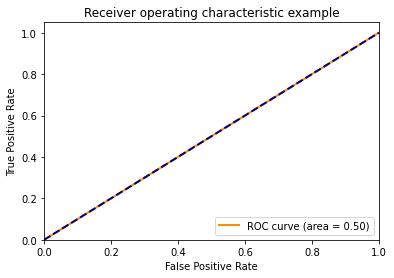

LR [0.         0.41566265 1.        ] [0.         0.29880478 1.        ] [2 1 0] 0.44157106513704214


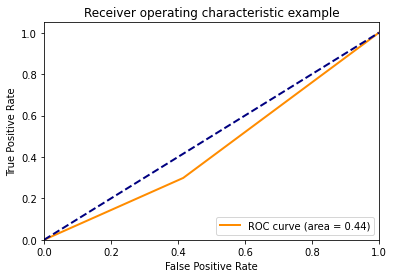

KNN [0.         0.02811245 1.        ] [0. 1. 1.] [2 1 0] 0.9859437751004015


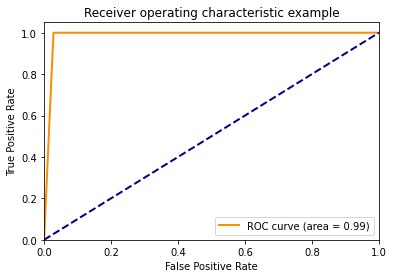

SVM [0.         0.12449799 1.        ] [0. 1. 1.] [2 1 0] 0.9377510040160643


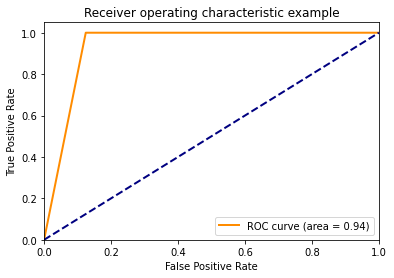

25% wrong [0.         0.23895582 1.        ] [0.         0.73904382 1.        ] [2 1 0] 0.7500440007040112


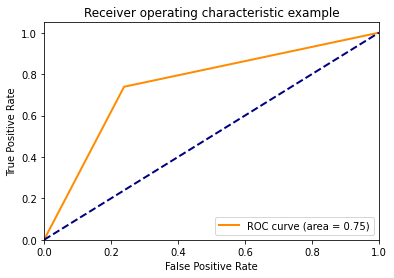

10% wrong [0.         0.08032129 1.        ] [0.         0.88047809 1.        ] [2 1 0] 0.9000784012544202


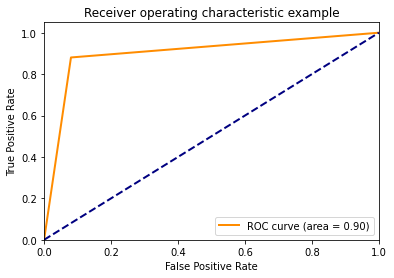

/home/hindle1/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/home/hindle1/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/home/hindle1/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0

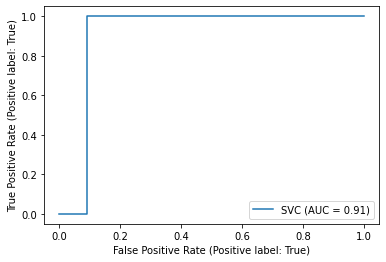

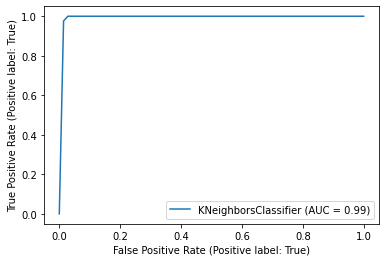

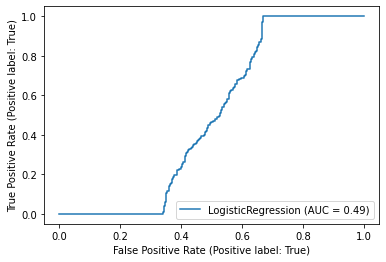

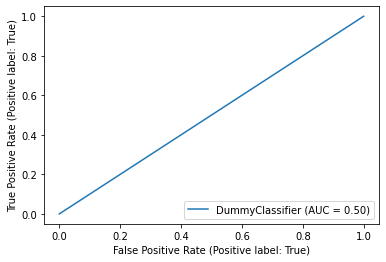

In [42]:
X_train, X_test, y_train, y_test = train_test_split(coffeeringX, coffeeringY, test_size=0.5, random_state=0)
svm = sklearn.svm.SVC()
svm.fit(X_train, y_train)
svmpredict = svm.predict(X_test)
lr = sklearn.linear_model.LogisticRegression()
lr.fit(X_train, y_train)
lrpredict = lr.predict(X_test)
zeror = sklearn.dummy.DummyClassifier(strategy="most_frequent")
zeror.fit(X_train, y_train)
zrpredict = zeror.predict(X_test)
knn = sklearn.neighbors.KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
knnpredict = knn.predict(X_test)

def plot_roc(fpr,tpr):
    import matplotlib.pyplot as plt
    # from sklearn developers 2020 BSD License 
    # from sklearn documentation https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % sklearn.metrics.auc(fpr,tpr))
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

fpr, tpr, thresholds = sklearn.metrics.roc_curve(y_test, zrpredict)
print("ZR", fpr, tpr, thresholds,  sklearn.metrics.auc(fpr,tpr))
plot_roc(fpr,tpr)
fpr, tpr, thresholds = sklearn.metrics.roc_curve(y_test, lrpredict)
print("LR",fpr, tpr, thresholds, sklearn.metrics.auc(fpr,tpr))
plot_roc(fpr,tpr)
fpr, tpr, thresholds = sklearn.metrics.roc_curve(y_test, knnpredict)
print("KNN",fpr, tpr, thresholds, sklearn.metrics.auc(fpr,tpr))
plot_roc(fpr,tpr)
fpr, tpr, thresholds = sklearn.metrics.roc_curve(y_test, svmpredict)
print("SVM",fpr, tpr, thresholds, sklearn.metrics.auc(fpr,tpr))
plot_roc(fpr,tpr)
wrong = y_test.copy()
wrong[0:wrong.shape[0]//4] = np.logical_not(wrong[0:wrong.shape[0]//4])
fpr, tpr, thresholds = sklearn.metrics.roc_curve(y_test, wrong)
print("25% wrong",fpr, tpr, thresholds, sklearn.metrics.auc(fpr,tpr))
plot_roc(fpr,tpr)
wrong = y_test.copy()
wrong[0:wrong.shape[0]//10] = np.logical_not(wrong[0:wrong.shape[0]//10])
fpr, tpr, thresholds = sklearn.metrics.roc_curve(y_test, wrong)
print("10% wrong",fpr, tpr, thresholds, sklearn.metrics.auc(fpr,tpr))
plot_roc(fpr,tpr)

# or just use sklearn out of the box
sklearn.metrics.plot_roc_curve(svm, X_test, y_test)  
sklearn.metrics.plot_roc_curve(knn, X_test, y_test)  
sklearn.metrics.plot_roc_curve(lr, X_test, y_test)  
sklearn.metrics.plot_roc_curve(zeror, X_test, y_test)  
plt.show()



## ROC Area
   - Area under the Receiver Operating Characteristic Curve
   - We plot True Positive versus True Negative 
   - sensitivity (TPR) versus specificity (TNR)
   - AUC ROC 0.5 - garbage
   - AUC ROC 0.7 - good

In [43]:
coffee_metric_eval(sklearn.metrics.roc_auc_score)


SVM 0.9377510040160643
LR 0.44157106513704214
ZeroR 0.5


# Train Test Split
- Make sure you evaluate on unseen data by shuffling and splitting
- options:
  - shuffle - should you shuffle, maybe you have a specific order already?
  - stratify - sample per class. Make sure that the train and test sets have samples in each class
  



In [44]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(coffeeringX, coffeeringY, test_size=0.5)
svm = sklearn.svm.SVC()
svm.fit(X_train, y_train)
svmpredict = svm.predict(X_test)
auc = sklearn.metrics.roc_auc_score(y_test,svmpredict)
print(auc)

0.9300411522633745


# Train Test Split Repeated
- Since the split is random, to be sure about performance we should repeat it and take statistics

In [45]:
perf = []
for i in range(20):
    X_train, X_test, y_train, y_test = train_test_split(coffeeringX, coffeeringY, test_size=0.5)
    svm = sklearn.svm.SVC()
    svm.fit(X_train, y_train)
    svmpredict = svm.predict(X_test)
    auc = sklearn.metrics.roc_auc_score(y_test,svmpredict)
    perf.append(auc)
    print(auc)
print("Average AUC on splits",np.average(perf))



0.9306418219461698
0.9279918864097363
0.9382716049382716
0.931726907630522
0.9307692307692308
0.9275929549902153
0.926441351888668
0.9245472837022133
0.9331941544885177
0.9353876739562624
0.9352589641434264
0.9344758064516129
0.9343434343434344
0.9237623762376237
0.9315992292870905
0.9297029702970296
0.9305835010060362
0.9264112903225806
0.9226069246435845
0.924643584521385
Average AUC on splits 0.9299976475986804


# Cross Folds Validation
- Use the entire train set to evaluate performance on unseen sections.
- Make sure each element of the train set gets evaluated once and trained on multiple times
- Good for determining the effect of a single outlier
- Very popular method


In [46]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(coffeeringX, coffeeringY, test_size=0.5)

lr = sklearn.linear_model.LogisticRegression()

svm = sklearn.svm.SVC()
# this will fit and evaluate
scores = sklearn.model_selection.cross_val_score(svm, coffeeringX , coffeeringY, cv=5, 
                                                 scoring='roc_auc')
print(svm,"\n",scores)
# this will fit and evaluate
scores = sklearn.model_selection.cross_val_score(lr, coffeeringX , coffeeringY, cv=5, 
                                                 scoring='roc_auc')
print(lr,"\n",scores)


SVC() 
 [0.926425   0.92285    0.9        0.920025   0.91040201]
LogisticRegression() 
 [0.446975   0.4638     0.457775   0.464275   0.50301508]


# Leave One Out
- Train on everything except the current test example
- Good for dealing with a lack of data
- Not great from an outlier or sampling perspective
- very expensive



In [47]:
%%time
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(coffeeringX, coffeeringY,test_size=0.95)
smallcx = X_train
smallcy = y_train

loo = sklearn.model_selection.LeaveOneOut()

# From https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.LeaveOneOut.html
scores = []
for train_index, test_index in loo.split(smallcx):
    #knn = sklearn.neighbors.KNeighborsClassifier(n_neighbors=3)
    svm = sklearn.svm.SVC()
    X_train, X_test = smallcx[train_index], smallcx[test_index]
    y_train, y_test = smallcy[train_index], smallcy[test_index]
    svm.fit(X_train,y_train)
    scores.append(svm.score(X_test,y_test))
print(len(scores),np.average(scores))

99 0.8787878787878788
CPU times: user 51.8 ms, sys: 0 ns, total: 51.8 ms
Wall time: 51.1 ms


## More resources
   - The wikipedia page is actually great
     - https://en.wikipedia.org/wiki/Precision_and_recall
     - https://en.wikipedia.org/wiki/Cohen's_kappa

# Let's Experiment!
## Coffee Stain
   - Find the coffee stain!
   - 2 classes
   - load ./data/coffee-ring/coffee-ring.arff
   - Try ZeroR
   - Try 1BK
   - Try SVM
   - Click Visualize
## Captcha 
   - Multiple classes (26 characters!)
   - load ./data/captcha/char3.arff
   - Try ZeroR
   - Try NaiveBayes
   - Try SVM
## Is a document reliability relevant?
   - load ./data/general/pgsqla_reliability_smallerdataset.arff
   - Word based
   - Can you predict if it is reliability related?
   - too many features!
## Dupe Bugs in Open Office
   - load ./data/dupe-bugs/off_swe_-_-.arff
   - Comparisons, can you tell which comparison will be a dupe bug or not?
## How to handle text :( (1/2)
   - load data/triage/data/angular.js/largewo.arff
   - None of this is useful!
   - delete id
   - Filter the owner to nominal
     - click owner
     - Weka -> Filters -> Unsupervised -> Attribute -> StringToNomial
       - click the arguments and change the index to 1
       - click apply
   - ...
** How to handle text :( (2/2)
   - Filter content to words!
     - click content
     - click filter
       - Weka -> Filters -> Unsupervised -> Attribute -> StringToWordVector
       - click arguments
       - click attributeindices
       - change to 2 or last
       - click OK
     - click apply
   - Go classify and try naivebayes